In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('transformed_data.csv', index_col='id', parse_dates=['date'])
df.head()

,Unnamed: 0,date,party,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5
id,,,,,,,,,
DE-0190001007,0,2017-10-24,DIE LINKE,0.038387,0.000000,0.001758,0.0,0.000000,0.081807
DE-0190001008,1,2017-10-24,CDU/CSU,0.037210,0.000000,0.000000,0.0,0.002192,0.067206
DE-0190001010,2,2017-10-24,BÜNDNIS 90/DIE GRÜNEN,0.032061,0.007978,0.000000,0.0,0.010129,0.075798
DE-0190002005,3,2017-11-21,CDU/CSU,0.029244,0.000000,0.009919,0.0,0.000000,0.030973
DE-0190002015,4,2017-11-21,AfD,0.000000,0.023143,0.145140,0.0,0.000000,0.000000


In [92]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## Grouped parties

In [94]:
grouped_df = df.groupby('date').mean()

In [95]:
n_topics = len(grouped_df.columns)

In [96]:
n_days = 10
rolling_df = grouped_df.rolling(n_days).mean().tail(-n_days)

In [97]:
rolling_df

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5
date,,,,,,
2018-02-02,0.013725,0.031231,0.021201,0.009961,0.017876,0.028511
2018-02-21,0.013095,0.029273,0.016110,0.012000,0.015949,0.036352
2018-02-22,0.014131,0.030841,0.011999,0.011494,0.016894,0.036462
2018-02-23,0.013662,0.030856,0.007877,0.014412,0.016985,0.037644
2018-02-28,0.012847,0.032422,0.008586,0.014085,0.017218,0.036558
...,...,...,...,...,...,...
2021-06-11,0.021218,0.006122,0.013532,0.008643,0.016304,0.027563
2021-06-23,0.022307,0.006138,0.016144,0.007806,0.014203,0.027117
2021-06-24,0.021771,0.007406,0.017547,0.008275,0.013354,0.027834


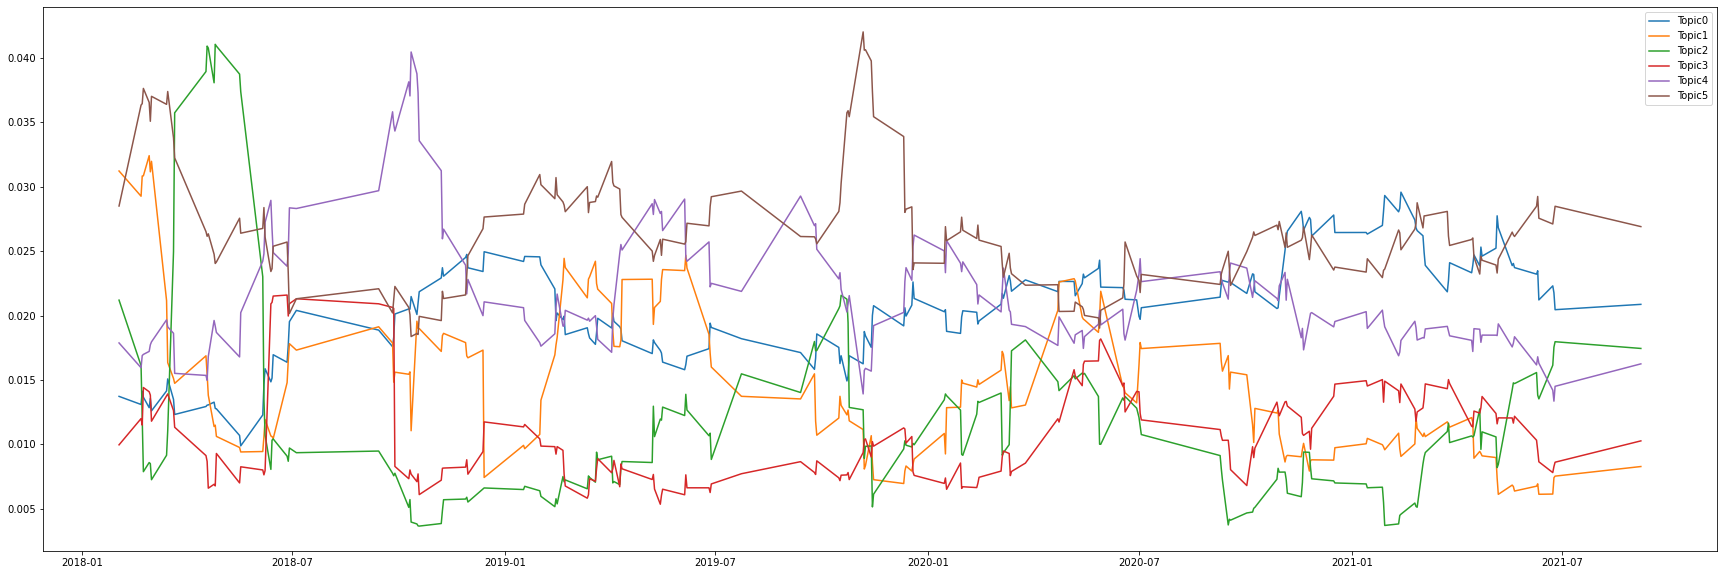

In [98]:
fig, ax = plt.subplots(figsize=(30, 10))

for topic_col in rolling_df.columns:
    ax.plot(rolling_df.index.values, rolling_df[topic_col].values, label=topic_col)
ax.legend()

## Parties differences

In [99]:
df.groupby('party').mean()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5
party,,,,,,
AfD,0.014955,0.010339,0.010395,0.008324,0.021186,0.034634
BÜNDNIS 90/DIE GRÜNEN,0.022708,0.013120,0.011013,0.012055,0.019013,0.025411
CDU/CSU,0.027209,0.015358,0.012481,0.011317,0.017806,0.023625
DIE LINKE,0.017548,0.010233,0.010121,0.009157,0.023706,0.027864
FDP,0.023617,0.013020,0.011075,0.009860,0.019219,0.024445
SPD,0.026098,0.012033,0.010138,0.013093,0.018597,0.024440
